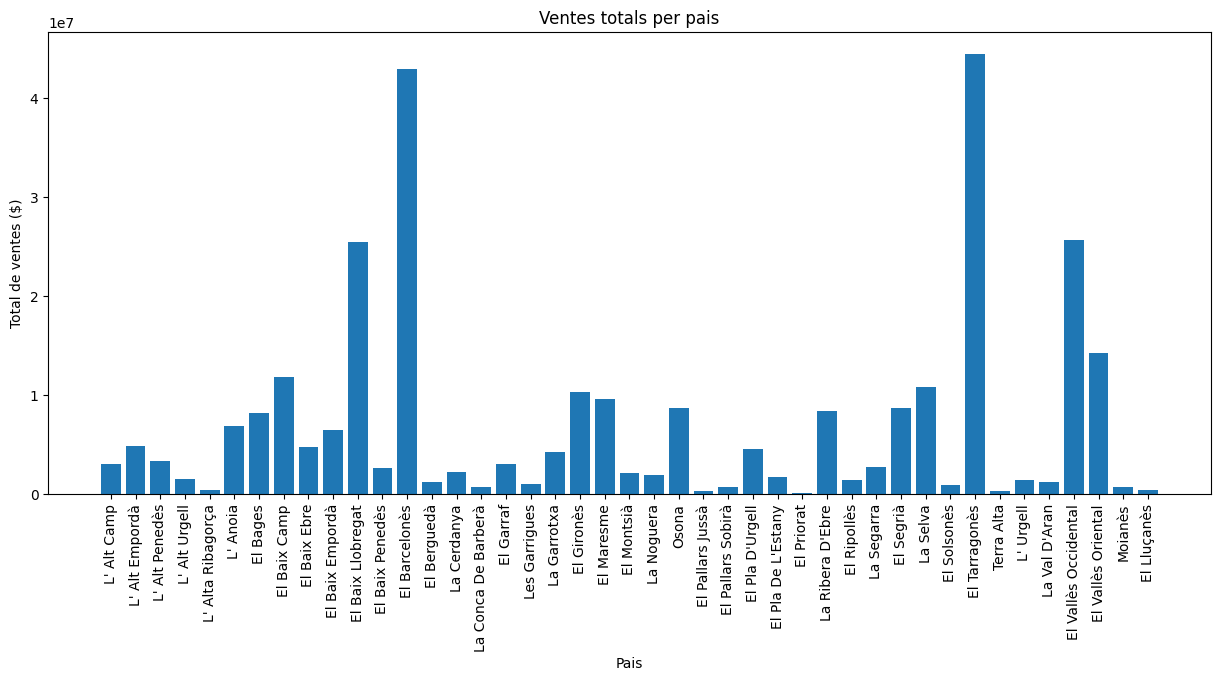

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Any                                     545 non-null    int64  
 1   Codi comarca                            545 non-null    int64  
 2   Comarca                                 545 non-null    object 
 3   Població                                545 non-null    int64  
 4   Domèstic xarxa                          545 non-null    int64  
 5   Activitats econòmiques i fonts pròpies  545 non-null    int64  
 6   Total                                   545 non-null    int64  
 7   Consum domèstic per càpita              545 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 34.2+ KB


Any  Domèstic xarxa  Activitats econòmiques i fonts pròpies
0   2012       329587399                               264070475
1   2013       313551779                               259345246
2   2014       309942495                               261405426
3   2015       313989027                               261428653
4   2016       318431495                               269429150
5   2017       321575409                               277151797
6   2018       320815198                               269683194
7   2019       326604221                               273181246
8   2020       345174787                               234113745
9   2021       338432965                               247774903
10  2022       330954411                               265598841
11  2023       322085377                               252183425
12  2024       313935196                               233601767

In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt

#El codi de Comarca està normalitzat per a totes les comarques de catalunya per l'IDESCAT.
aigua =  pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")


#Aquesta funció em posa l'article el davant, elimina espais i em posa en majúscules les lletres després de cada espai.
def format_comarca(nom):
    nom = nom.strip().title()  # Pasa a formato capitalizado
    match = re.search(r",\s*(L'|La|El|Els|Les)$", nom, re.IGNORECASE)
    if match:
        article = match.group(1).capitalize()
        base = nom[:match.start()]
        return f"{article} {base}"
    return nom

aigua["Comarca"] = aigua["Comarca"].apply(format_comarca)
aigua[aigua["Comarca"] == "El Baix Empordà"]
#Les unitats dels volums es troben en METRES CÚBICS
# aigua = aigua[aigua["Any"] == 2024]
# aigua = aigua.sort_values(by="Consum domèstic per càpita",ascending=False)
# aigua["Balanç de consum"] = aigua["Activitats econòmiques i fonts pròpies"]/aigua["Domèstic xarxa"]

plt.figure(figsize=(15,6))
plt.bar(aigua["Comarca"], height=aigua["Activitats econòmiques i fonts pròpies"])
plt.xticks(rotation=90)
plt.title('Ventes totals per pais')
plt.xlabel('Pais')
plt.ylabel('Total de ventes ($)')
plt.show()

aigua.info()
aigua.groupby(["Any"])[["Domèstic xarxa","Activitats econòmiques i fonts pròpies"]].sum().reset_index()

C:\Users\favil\AppData\Local\Temp\ipykernel_20948\104545535.py:4: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")


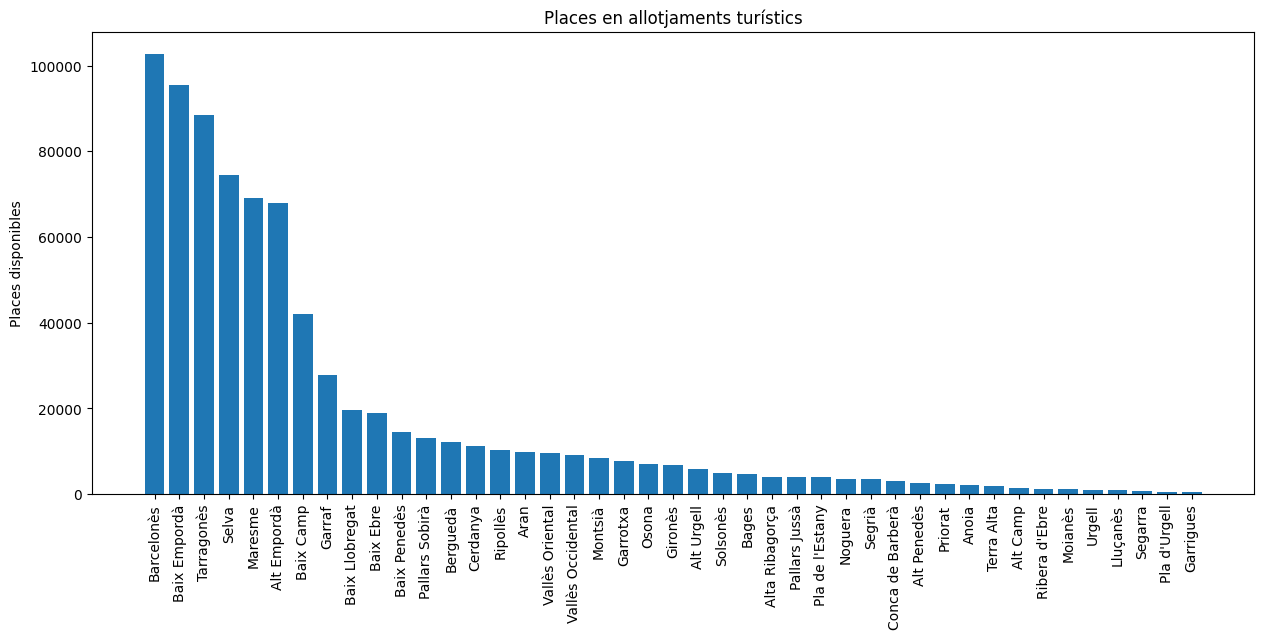

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)

turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")
turisme.iloc[:,21]
turisme[["Tipus establiment","Número inscripció","Dígit de control","Comarca","Codi Comarca (IDESCAT)","Grup","Modalitat","Categoria","Unitat d'allotjament","Total places","Total estances"]]
turisme =turisme.groupby("Comarca")[["Total places"]].sum().sort_values(by="Total places",ascending=False).reset_index()

plt.figure(figsize=(15,6))
plt.bar(turisme["Comarca"], height=turisme["Total places"])
plt.title('Places en allotjaments turístics')
plt.ylabel('Places disponibles')
plt.xticks(rotation=90)

plt.show()

In [51]:
import pandas as pd
pd.set_option('display.max_columns', None)

turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")
turisme.iloc[:,21]
turisme=turisme[["Tipus establiment","Número inscripció","Dígit de control","Comarca","Codi Comarca (IDESCAT)","Grup","Modalitat","Categoria","Unitat d'allotjament","Total places","Total estances"]]
agrupat =turisme.groupby("Comarca")[["Total places"]].sum().sort_values(by="Total places",ascending=False).reset_index()
turisme[turisme["Comarca"] == "Barcelonès"].groupby(["Tipus establiment","Comarca"])["Número inscripció"].nunique().reset_index().sort_values(by="Número inscripció",ascending=False)
# turisme.groupby("Tipus establiment")["Total places"].sum()
# turisme[turisme["Comarca"] == "Barcelonès"].groupby(["Tipus establiment","Comarca"])["Total places"].sum().reset_index().sort_values(by="Total places",ascending=False)
# Da lo mismo que .isna

turisme["Total places"].sum()
turisme.drop_duplicates(subset="Número inscripció")

C:\Users\favil\AppData\Local\Temp\ipykernel_30640\2483048214.py:4: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")


Tipus establiment Número inscripció  Dígit de control  \
0       Apartaments Turístics        ATB-000002                59   
1       Apartaments Turístics        ATB-000003                66   
2       Apartaments Turístics        ATB-000004                61   
3       Apartaments Turístics        ATB-000005                 3   
4       Apartaments Turístics        ATB-000006                63   
...                       ...               ...               ...   
113645          Turisme rural        PVA-000640                72   
113646          Turisme rural        PVA-000641                75   
113647          Turisme rural        PVA-001015                93   
113648          Turisme rural        PVA-001379                85   
113649          Turisme rural        PVA-001652                13   

               Comarca  Codi Comarca (IDESCAT)  \
0       Baix Llobregat                      11   
1           Barcelonès                      13   
2               Garraf                      17   
3           Barcelonès                      13   
4       Baix Llobregat                      11   
...                ...                     ...   
113645            Aran                      39   
113646            Aran                      39   
113647            Aran                      39   
113648            Aran                      39   
113649            Aran                      39   

                                               Grup               Modalitat  \
0                                               NaN                     NaN   
1                                               NaN                     NaN   
2                                               NaN                     NaN   
3                                               NaN                     NaN   
4                                               NaN                     NaN   
...                                             ...                     ...   
113645                          Allotjaments rurals   Casa poble compartida   
113646                          Allotjaments rurals  Casa poble independent   
113647                          Allotjaments rurals  Casa poble independent   
113648  Cases de pagès o establiments d'agroturisme  Casa poble independent   
113649                          Allotjaments rurals               Masoveria   

                 Categoria Unitat d'allotjament  Total places  Total estances  
0       Sense categoritzar          Apartaments          36.0            18.0  
1       Sense categoritzar          Apartaments         170.0            85.0  
2       Sense categoritzar          Apartaments          12.0             6.0  
3       Sense categoritzar          Apartaments          98.0            49.0  
4       Sense categoritzar          Apartaments          22.0            10.0  
...                    ...                  ...           ...             ...  
113645  Sense categoritzar            Habitació          10.0             4.0  
113646  Sense categoritzar            Habitació          12.0             5.0  
113647  Sense categoritzar            Habitació          12.0             5.0  
113648  Sense categoritzar            Habitació           5.0             3.0  
113649                 NaN            Habitació          15.0             7.0  

[113650 rows x 11 columns]

In [2]:
import pandas as pd
import re
pd.set_option('display.max_columns', None)

agrari = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa_d_explotacions_agr_coles__DUN__de_Catalunya_20250716.csv")

#La DUN és una declaració anual que ha de presentar obligatòriament la persona titular de l'explotació, tant si sol·licita ajuts com si no ho fa.
# Faig la conversió de les columnes que estan en FLOAT a INTEGER, per poder fer servir els codis de les comarque si fer merge més endavant.´
# SUGGERÈNCIA: Puc fer una taula de codis de comarques i eliminar les comarques del dataset, tot i que en python no molesten, si vull fer servir PowerBI per fer el model estaria guai.
columnes_a_convertir = agrari.columns[[0,1,4,6,9,13,14]]
agrari[columnes_a_convertir] = agrari[columnes_a_convertir].astype("Int64")
#Els camps que seleccionaré seran la CAMPANYA, OC (Codi Comarcal), OTE (Tipus de cultiu(Pot variar d'un any per l'altre)), AJUTS(¿Potser?), VENDA_PROX(¿?)

agrari = agrari[["CAMPANYA","ID_EXP","OC","OTE","AJUTS","VENDA_PROX","HA_DEC"]]

agrari.groupby(["CAMPANYA","OC"]).HA_DEC.sum().reset_index().sort_values(by="HA_DEC", ascending=False)
agrari["AJUTS"] = agrari["AJUTS"].str.split("-")

# def taula_categories_ote (ote):
#     ote.strsplit("-")
#     # for word in ote:
#     #     if isinstance(word, (str)):
#     #         try:
#     #             word = int(word)
#     #             taula["ID"] = word
#     #         except ValueError:
#     #             taula["Descripció"] = word
#     #             continue
#     # return taula

# agrari["OTE"].apply(taula_categories_ote)
agrari.groupby(["CAMPANYA"]).HA_DEC.sum().reset_index().sort_values(by="HA_DEC")
# agrari.groupby("CAMPANYA").HA_DEC.sum()
# agrari.groupby(["CAMPANYA","VENDA_PROX"]).HA_DEC.sum()
x = 1465433.37
cat = 3189500
a = x/cat
a

0.45945551653864247

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from IPython.display import HTML
import imageio

# Cargar dades
comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=['idescat:comarca'])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)

aigua = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua["Codi comarca"] = aigua["Codi comarca"].astype(int)

# Merge
merged = comarques.merge(aigua, left_on="idescat:comarca", right_on="Codi comarca")
anys = sorted(merged["Any"].unique())

# Escala de color
vmin = merged["Consum domèstic per càpita"].min()
vmax = merged["Consum domèstic per càpita"].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.YlGnBu
sm = ScalarMappable(cmap=cmap, norm=norm)
sm._A = []

# Crear figura y cerrar para evitar renderizado estático
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.close(fig)  #Esta línea evita el gráfico extra que se genera al 

# Solo agregar leyenda una vez
leyenda_agregada = [False]

def update(frame):
    ax.clear()
    any_actual = anys[frame]
    dades_any = merged[merged["Any"] == any_actual]

    dades_any.plot(column="Consum domèstic per càpita",
                   cmap=cmap,
                   linewidth=0.8,
                   edgecolor='black',
                   ax=ax,
                   norm=norm)

    ax.set_title(f"Consum domèstic per càpita l'any {any_actual}", fontsize=16)
    ax.axis('off')

    if not leyenda_agregada[0]:
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label("Litres/persona/dia")
        leyenda_agregada[0] = True

# Crear animación
ani = FuncAnimation(fig, update, frames=len(anys), interval=1000, repeat=True)

# Mostrar en Jupyter sin figura extra
HTML(ani.to_jshtml())

# Guardar com a GIF
ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa consum capita.gif", writer="pillow", fps=1)

#Guardar en MP4
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=1)
# ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa consum capita.mp4", writer=writer)


In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from IPython.display import HTML
import imageio

# Cargar dades
comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=['idescat:comarca'])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)

aigua = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua["Codi comarca"] = aigua["Codi comarca"].astype(int)
aigua["Activitats econòmiques i fonts pròpies"] = aigua["Activitats econòmiques i fonts pròpies"]/1000000

# Merge
merged = comarques.merge(aigua, left_on="idescat:comarca", right_on="Codi comarca")
anys = sorted(merged["Any"].unique())

# Escala de color
vmin = merged["Activitats econòmiques i fonts pròpies"].min()
vmax = 80
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.YlGnBu
sm = ScalarMappable(cmap=cmap, norm=norm)
sm._A = []

# Crear figura y cerrar para evitar renderizado estático
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.close(fig)  #Esta línea evita el gráfico extra que se genera al 

# Solo agregar leyenda una vez
leyenda_agregada = [False]

def update(frame):
    ax.clear()
    any_actual = anys[frame]
    dades_any = merged[merged["Any"] == any_actual]

    dades_any.plot(column="Activitats econòmiques i fonts pròpies",
                   cmap=cmap,
                   linewidth=0.8,
                   edgecolor='black',
                   ax=ax,
                   norm=norm)

    ax.set_title(f"Consum d'activitats econòmiques i fonts pròpies l'any {any_actual}", fontsize=16)
    ax.axis('off')

    if not leyenda_agregada[0]:
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label(r"hm3")
        leyenda_agregada[0] = True

# Crear animación
ani = FuncAnimation(fig, update, frames=len(anys), interval=1000, repeat=True)

# Mostrar en Jupyter sin figura extra
HTML(ani.to_jshtml())

# Guardar com a GIF
ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa consum activitat econòmica.gif", writer="pillow", fps=1)

#Guardar en MP4
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=1)
# ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa consum capita.mp4", writer=writer)

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from IPython.display import HTML
import imageio

# Cargar dades
comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=['idescat:comarca'])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)

aigua = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua["Codi comarca"] = aigua["Codi comarca"].astype(int)
aigua["Domèstic xarxa"] = aigua["Domèstic xarxa"]/1000000

# Merge
merged = comarques.merge(aigua, left_on="idescat:comarca", right_on="Codi comarca")
anys = sorted(merged["Any"].unique())

# Escala de color
vmin = merged["Domèstic xarxa"].min()
vmax = merged["Domèstic xarxa"].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.YlGnBu
sm = ScalarMappable(cmap=cmap, norm=norm)
sm._A = []

# Crear figura y cerrar para evitar renderizado estático
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.close(fig)  #Esta línea evita el gráfico extra que se genera al 

# Solo agregar leyenda una vez
leyenda_agregada = [False]

def update(frame):
    ax.clear()
    any_actual = anys[frame]
    dades_any = merged[merged["Any"] == any_actual]

    dades_any.plot(column="Domèstic xarxa",
                   cmap=cmap,
                   linewidth=0.8,
                   edgecolor='black',
                   ax=ax,
                   norm=norm)

    ax.set_title(f"Consum domèstic de la xarxa l'any {any_actual}", fontsize=16)
    ax.axis('off')

    if not leyenda_agregada[0]:
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label(r"hm3")
        leyenda_agregada[0] = True

# Crear animación
ani = FuncAnimation(fig, update, frames=len(anys), interval=1000, repeat=True)

# Mostrar en Jupyter sin figura extra
HTML(ani.to_jshtml())

# Guardar com a GIF
ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa consum domèstic xarxa.gif", writer="pillow", fps=1)

#Guardar en MP4
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=1)
# ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa consum capita.mp4", writer=writer)

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Patch
from IPython.display import HTML

# Cargar dades
comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=['idescat:comarca'])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)

aigua = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua["Codi comarca"] = aigua["Codi comarca"].astype(int)

# Merge
merged = comarques.merge(aigua, left_on="idescat:comarca", right_on="Codi comarca")
merged["Index_activitat"] = merged["Activitats econòmiques i fonts pròpies"] / merged["Domèstic xarxa"]
anys = sorted(merged["Any"].unique())

# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.close(fig)

# Leyenda personalizada
legend_elements = [
    Patch(facecolor='#a03968', edgecolor='black', label='Índex > 1 (Més activitat econòmica)'),
    Patch(facecolor='#39a071', edgecolor='black', label='Índex ≤ 1 (Més ús domèstic)')
]

# Función de actualización
def update(frame):
    ax.clear()
    any_actual = anys[frame]
    dades_any = merged[merged["Any"] == any_actual].copy()

    # Asignar color según condición
    dades_any["color"] = dades_any["Index_activitat"].apply(
        lambda x: '#a03968' if x > 1 else "#39a071"
    )

    # Dibujar mapa
    dades_any.plot(color=dades_any["color"],
                   linewidth=0.8,
                   edgecolor='black',
                   ax=ax)

    # Título y leyenda
    ax.set_title(f"Índex d'activitat econòmica l'any {any_actual}", fontsize=16)
    ax.axis('off')
    ax.legend(handles=legend_elements, loc='lower right', fontsize=9, frameon=True)

# Crear animació
ani = FuncAnimation(fig, update, frames=len(anys), interval=1000, repeat=True)

# Mostrar en Jupyter
HTML(ani.to_jshtml())

# Guardar com a GIF
ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa index activitat econòmica.gif", writer="pillow", fps=1)

In [ ]:
# En este caso se puede ver un degradado el cual permite diferenciar los diferentes niveles.
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from IPython.display import HTML

# Cargar datos
comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=['idescat:comarca'])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)

aigua = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua["Codi comarca"] = aigua["Codi comarca"].astype(int)

# Merge
merged = comarques.merge(aigua, left_on="idescat:comarca", right_on="Codi comarca")
merged["Index_activitat"] = merged["Activitats econòmiques i fonts pròpies"]/merged["Domèstic xarxa"]
anys = sorted(merged["Any"].unique())

# Preparar normalizador y colormap continuo
vmin = merged["Index_activitat"].min()
vmax = 2
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.RdYlBu_r  # Cambia a otro si quieres (e.g. 'coolwarm', 'plasma', 'inferno')

# Crear figura y eje
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.close(fig)
# Selecciona datos del primer año para inicializar
dades_any = merged[merged["Any"] == anys[0]]

# Plot inicial con color según el primer año, guardando la colección para actualizar después
gdf_plot = dades_any.plot(
    column="Index_activitat",
    cmap=cmap,
    linewidth=0.8,
    edgecolor='black',
    norm=norm,
    ax=ax
)

# Añadir barra de color
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)

ax.axis('off')

# Función para actualizar colores en la animación
def update(frame):
    any_actual = anys[frame]
    dades_any = merged[merged["Any"] == any_actual]

    # Obtener array de valores para actualizar colores
    valores = dades_any["Index_activitat"].values

    # Actualizar colores de las geometrías existentes
    gdf_plot.collections[0].set_array(valores)
    ax.set_title(f"Índex d'activitat econòmica l'any {any_actual}", fontsize=16)

ani = FuncAnimation(fig, update, frames=len(anys), interval=1000, repeat=True)

HTML(ani.to_jshtml())

In [104]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from IPython.display import HTML

# 1. Cargar geometría de comarques
comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=["idescat:comarca"])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)
comarques_base = comarques.set_index("idescat:comarca")

# 2. Cargar y preparar datos agrarios
agrari = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa_d_explotacions_agr_coles__DUN__de_Catalunya_20250716.csv")

# Convertir columnas a Int64


columnes_a_convertir = agrari.columns[[0,1,4,6,9,13,14]]
agrari[columnes_a_convertir] = agrari[columnes_a_convertir].astype("Int64")

# Agrupar datos
agrupat = agrari.groupby(["CAMPANYA", "OC"])["HA_DEC"].sum().reset_index()
agrupat.rename(columns={"OC":"idescat:comarca"}, inplace=True)

anys = sorted(agrupat["CAMPANYA"].unique())
vmin, vmax = 0, agrupat["HA_DEC"].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Oranges

# 4. Preparar figura y mapa base con datos del primer año
fig, ax = plt.subplots(figsize=(10, 8))
plt.close(fig)

dades0 = agrupat[agrupat["CAMPANYA"] == anys[0]].set_index("idescat:comarca")
gdf0 = comarques_base.join(dades0)[["geometry", "HA_DEC"]]
gdf0["HA_DEC"] = gdf0["HA_DEC"].fillna(0)  # Rellenar NaN con 0

gdf_plot = gdf0.plot(
    column="HA_DEC",
    cmap=cmap,
    linewidth=0.8,
    edgecolor="black",
    norm=norm,
    ax=ax,
    missing_kwds={"color": "lightgrey"}
)

# Colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
fig.colorbar(sm, ax=ax)
ax.axis("off")
ax.set_title(f"Hectàrees declarades per comarca - Any {anys[0]}", fontsize=16)

# 5. Función de actualización para la animación
def update(frame):
    any_actual = anys[frame]
    dades = agrupat[agrupat["CAMPANYA"] == any_actual].set_index("idescat:comarca")
    joined = comarques_base.join(dades)[["geometry", "HA_DEC"]]
    joined["HA_DEC"] = joined["HA_DEC"].fillna(0)  # Rellenar NaN con 0
    
    gdf_plot.collections[0].set_array(joined["HA_DEC"].values)
    ax.set_title(f"Hectàrees explotades l'any {any_actual}", fontsize=16)

# 6. Crear animación
ani = FuncAnimation(fig, update, frames=len(anys), interval=1000, repeat=True)
HTML(ani.to_jshtml())
ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa hectarees explotades.gif", writer="pillow", fps=1)

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Cargar geometría
comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=["idescat:comarca"])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)
comarques_base = comarques.set_index("idescat:comarca")

# Cargar y limpiar datos
agrari = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa_d_explotacions_agr_coles__DUN__de_Catalunya_20250716.csv")
agrari = agrari[pd.to_numeric(agrari["CAMPANYA"], errors="coerce").notnull()]
agrari["CAMPANYA"] = agrari["CAMPANYA"].astype(int)

# Agrupar por año, comarca y categoría
agrupat = agrari.groupby(["CAMPANYA", "OC", "OTE"])["HA_DEC"].sum().reset_index()
agrupat.rename(columns={"OC": "idescat:comarca"}, inplace=True)

# Obtener categoría dominante
dominant = agrupat.loc[agrupat.groupby(["CAMPANYA", "idescat:comarca"])["HA_DEC"].idxmax()]

# Años únicos ordenados
anys = sorted(dominant["CAMPANYA"].unique())

# Categorías y colores
categories = sorted(dominant["OTE"].dropna().unique())
category_codes = {cat: i for i, cat in enumerate(categories)}
cmap = plt.cm.get_cmap("tab20", len(categories))

# Crear figura
fig, ax = plt.subplots(figsize=(15, 11))
plt.close(fig)  # Evita mostrar gráfico estático

def update(frame):
    ax.clear()
    ax.axis("off")
    any_actual = anys[frame]
    dades_any = dominant[dominant["CAMPANYA"] == any_actual].set_index("idescat:comarca")
    gdf = comarques_base.join(dades_any)

    gdf["color"] = gdf["OTE"].map(category_codes)
    gdf.plot(column="color", cmap=cmap, edgecolor="black", linewidth=0.5, ax=ax)

    ax.set_title(f"Categoria dominant per comarca l'any {any_actual}", fontsize=16)

    # Leyenda a la izquierda
    handles = [
        plt.Line2D([0], [0], marker='s', linestyle='None',
                   markerfacecolor=cmap(category_codes[cat]),
                   markeredgecolor='black', markersize=10, label=cat)
        for cat in categories
    ]
    ax.legend(handles=handles, title="Categoria", loc='center left', bbox_to_anchor=(0.60, 0.10), fontsize=12)

# Crear animación
ani = FuncAnimation(fig, update, frames=len(anys), interval=1000, repeat=True)
HTML(ani.to_jshtml())
ani.save(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa categories explotacions.gif", writer="pillow", fps=1)

C:\Users\favil\AppData\Local\Temp\ipykernel_58560\2422180132.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(categories))


C:\Users\favil\AppData\Local\Temp\ipykernel_47816\2635244941.py:5: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")


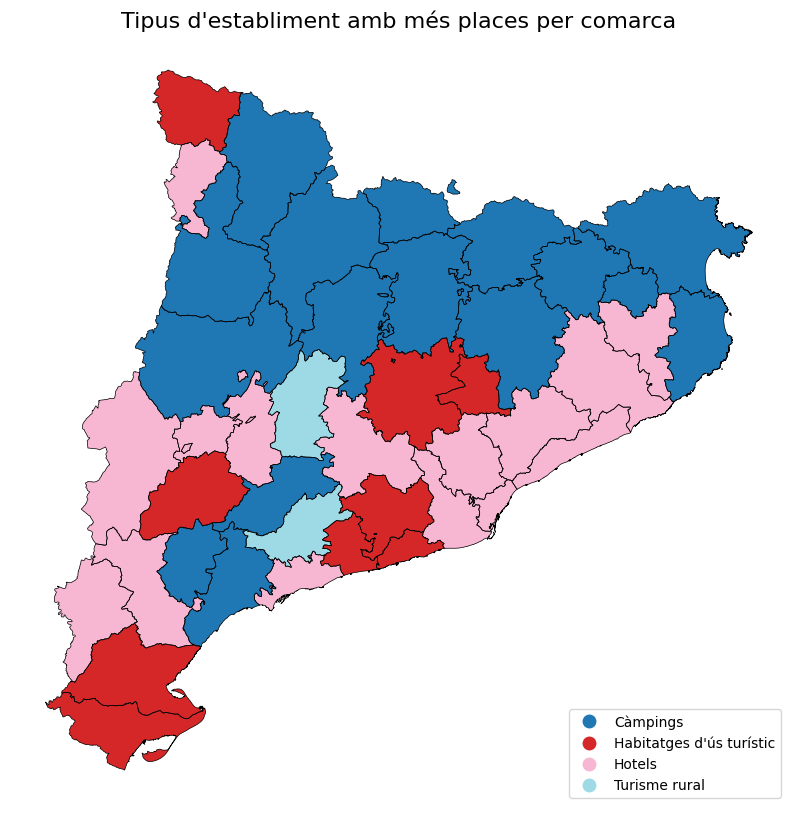

In [5]:
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)

turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")
turisme.iloc[:,21]
turisme=turisme[["Tipus establiment","Número inscripció","Dígit de control","Comarca","Codi Comarca (IDESCAT)","Grup","Modalitat","Categoria","Unitat d'allotjament","Total places","Total estances"]]
agrupat =turisme.groupby("Comarca")[["Total places"]].sum().sort_values(by="Total places",ascending=False).reset_index()
turisme[turisme["Comarca"] == "Barcelonès"].groupby(["Tipus establiment","Comarca"])["Número inscripció"].nunique().reset_index().sort_values(by="Número inscripció",ascending=False)
# turisme.groupby("Tipus establiment")["Total places"].sum()
# turisme[turisme["Comarca"] == "Barcelonès"].groupby(["Tipus establiment","Comarca"])["Total places"].sum().reset_index().sort_values(by="Total places",ascending=False)
# Da lo mismo que .isna

nombre_allotjaments = turisme.groupby(["Codi Comarca (IDESCAT)","Tipus establiment"])["Total places"].sum().reset_index()
resultat= nombre_allotjaments[nombre_allotjaments["Total places"] == nombre_allotjaments.groupby("Codi Comarca (IDESCAT)")["Total places"].transform('max')]

comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=["idescat:comarca"])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)
comarques = comarques.merge(resultat, left_on="idescat:comarca", right_on="Codi Comarca (IDESCAT)")

nombre_allotjaments
resultat

import matplotlib.pyplot as plt

# Creamos la figura y ejes
fig, ax = plt.subplots(figsize=(12, 10))

# Dibujamos las comarcas con un color base
comarques.boundary.plot(ax=ax, color="black", linewidth=0.5)

# Pintamos las comarcas con el tipo de establecimiento mayoritario
comarques.plot(
    column="Tipus establiment",      # variable categórica
    categorical=True,
    legend=True,
    ax=ax,
    cmap="tab20",
    legend_kwds={
        "loc": "lower right",        # ubicación abajo derecha
        "bbox_to_anchor": (1, 0)     # ancla en la esquina inferior derecha
    }
)

# Personalización
ax.set_title("Tipus d'establiment amb més places per comarca", fontsize=16)
ax.axis("off")

plt.show()

C:\Users\favil\AppData\Local\Temp\ipykernel_20948\825499389.py:5: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")


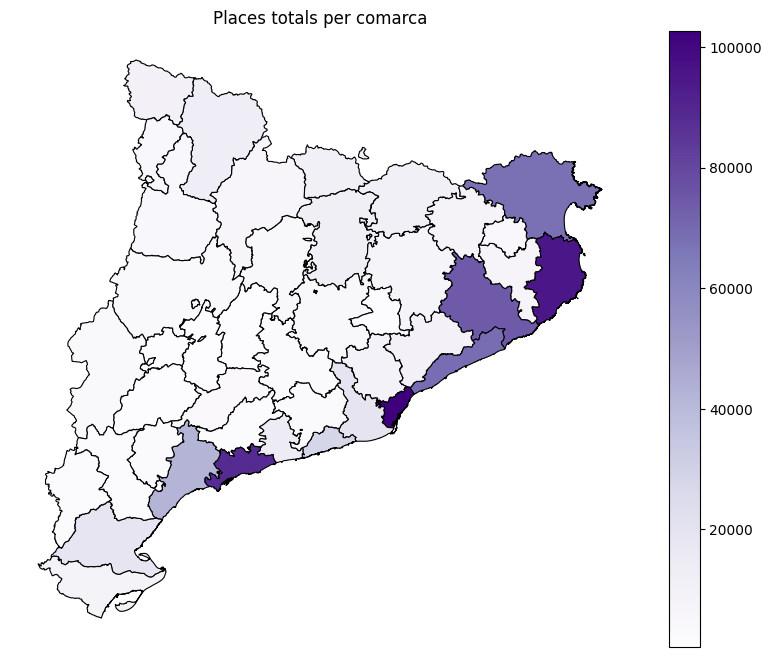

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")
turisme.iloc[:,21]
turisme = turisme[["Tipus establiment","Número inscripció","Dígit de control","Comarca","Codi Comarca (IDESCAT)","Grup","Modalitat","Categoria","Unitat d'allotjament","Total places","Total estances"]]
turisme = turisme.groupby("Codi Comarca (IDESCAT)")[["Total places"]].sum().sort_values(by="Total places",ascending=False).reset_index()

comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=['idescat:comarca'])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)

# # Uneix amb el GeoDataFrame per afegir dades
comarques = comarques.merge(turisme, left_on="idescat:comarca", right_on="Codi Comarca (IDESCAT)")


# # Dibuixa el mapa, acolorint per nombre d'habitants
fig, ax = plt.subplots(1, 1, figsize=(10, 8))


comarques.plot(column="Total places", cmap="Purples", linewidth=0.8, edgecolor='black', legend=True, ax=ax)

# # Afegeix etiquetes amb el nom de la comarca tot i que la visualització és bastant lletja.
# for idx, row in comarques.iterrows():
#     plt.annotate(text=row["Comarca"], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
#                  horizontalalignment='center', fontsize=8)

plt.title("Places totals per comarca")
plt.axis('off')
plt.show()


C:\Users\favil\AppData\Local\Temp\ipykernel_35148\1373332808.py:10: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")


Estadístico: 0.8635545053694322
p-valor: 0.00023261213412485883
Se rechaza H0 → los datos NO son normales


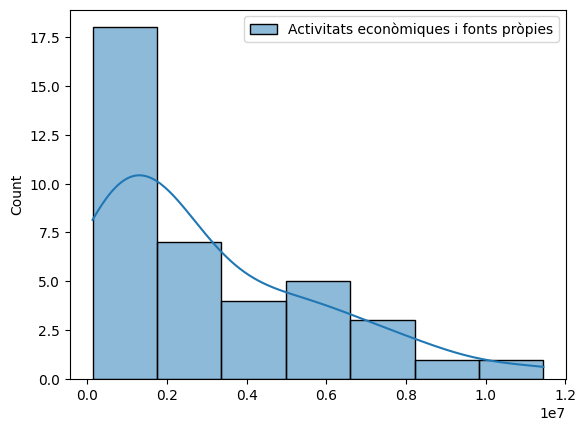

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#El codi de Comarca està normalitzat per a totes les comarques de catalunya per l'IDESCAT.
aigua =  pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua = aigua[["Any", "Codi comarca", "Activitats econòmiques i fonts pròpies"]]
aigua = aigua[aigua["Any"] == 2024]
aigua = aigua[["Codi comarca", "Activitats econòmiques i fonts pròpies"]]

turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")
turisme.iloc[:,21]
turisme = turisme[["Tipus establiment","Número inscripció","Dígit de control","Comarca","Codi Comarca (IDESCAT)","Grup","Modalitat","Categoria","Unitat d'allotjament","Total places","Total estances"]]
turisme = turisme.groupby("Codi Comarca (IDESCAT)")[["Total places"]].sum().sort_values(by="Total places",ascending=False).reset_index()

agrari = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa_d_explotacions_agr_coles__DUN__de_Catalunya_20250716.csv")
columnes_a_convertir = agrari.columns[[0,1,4,6,9,13,14]]
agrari[columnes_a_convertir] = agrari[columnes_a_convertir].astype("Int64")
agrari =agrari[agrari["CAMPANYA"] == 2024]
agrari = agrari.groupby("OC").HA_DEC.sum().reset_index()

#La comarca 43, lluçanès desapareix perquè no apreix a la base de dades agrària.
merge1 = aigua.merge(turisme, left_on="Codi comarca", right_on="Codi Comarca (IDESCAT)")
merge1 = merge1[merge1["Activitats econòmiques i fonts pròpies"] < 15000000]

import numpy as np
from scipy.stats import shapiro

data = merge1[["Activitats econòmiques i fonts pròpies"]]  # mostra

# Test de Shapiro-Wilk
stat, p = shapiro(data)
print("Estadístico:", stat)
print("p-valor:", p)

if p > 0.05:
    print("No se rechaza H0 → los datos parecen normales")
else:
    print("Se rechaza H0 → los datos NO son normales")

import seaborn as sns
import scipy.stats as stats

sns.histplot(data, kde=True)
plt.show()




Estadístico: 0.6029850143150924
p-valor: 4.617142431835746e-09
Se rechaza H0 → los datos NO son normales


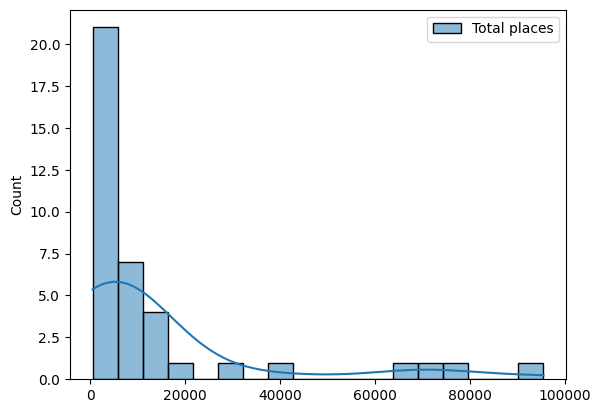

Coeficiente de Pearson: 0.47206051049856323
Coeficiente de Spearman: 0.42327935222672064
p-valor: 0.0024128375097547013
p-valor: 0.007255396895268613
Coeficiente (pendiente): 57.779356660301616
Intercepto: 2218516.209642705
R²: 0.22284112557216418


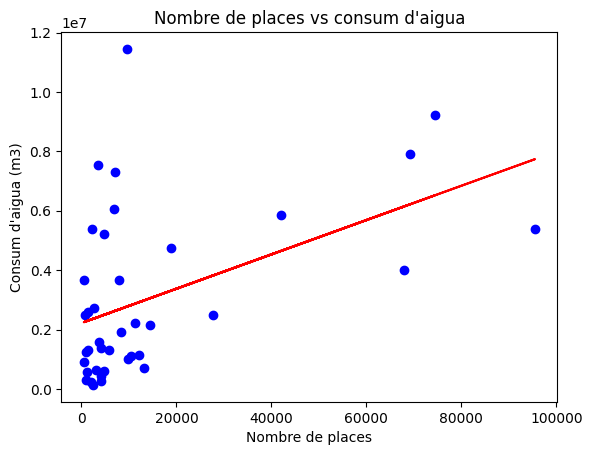

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr,spearmanr
from scipy.stats import shapiro

data = merge1[["Total places"]]
# Test de Shapiro-Wilk

stat, p = shapiro(data)
print("Estadístico:", stat)
print("p-valor:", p)



if p > 0.05:
    print("No se rechaza H0 → los datos parecen normales")
else:
    print("Se rechaza H0 → los datos NO son normales")

import seaborn as sns
import scipy.stats as stats

sns.histplot(data, kde=True)
plt.show()

# Datos de ejemplo
x = np.array(merge1["Total places"])
y =np.array(merge1["Activitats econòmiques i fonts pròpies"])

# Calcular coeficiente y p-valor
coef, p = pearsonr(x, y)
coef1, p1 = spearmanr(x,y)
print("Coeficiente de Pearson:", coef)
print("Coeficiente de Spearman:", coef1)
print("p-valor:", p)
print("p-valor:", p1)


# Datos de ejemplo
y = np.array(merge1["Activitats econòmiques i fonts pròpies"])  # variable independiente
X = np.array(merge1["Total places"]).reshape(-1,1)                 # variable dependiente

# Creamos el modelo
modelo = LinearRegression()

# Entrenamos
modelo.fit(X, y)

# Predicciones
y_pred = modelo.predict(X)

# Resultados
print("Coeficiente (pendiente):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("R²:", modelo.score(X, y))

# Gráfico
plt.scatter(X, y, color="blue", label="Datos reales")
plt.plot(X, y_pred, color="red", label="Recta de regresión")
plt.xlabel("Nombre de places")
plt.ylabel("Consum d'aigua (m3)")
plt.title("Nombre de places vs consum d'aigua")
plt.show()

Estadístico: 0.9333521065998512
p-valor: 1.5691726445656136e-08
Se rechaza H0 → los datos NO son normales


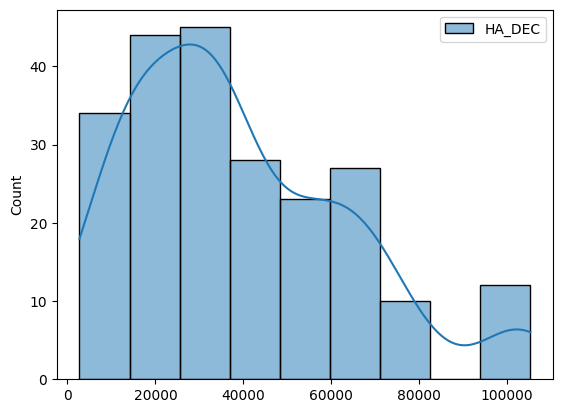

Coeficiente de Pearson: -0.09974545007968798
Coeficiente de Spearman: -0.14017997818446248
p-valor: 0.13758311311694868
p-valor: 0.0364466290617516
Coeficiente (pendiente): -12.14685057566606
Intercepto: 3880209.2768520396
R²: 0.009949154811599525


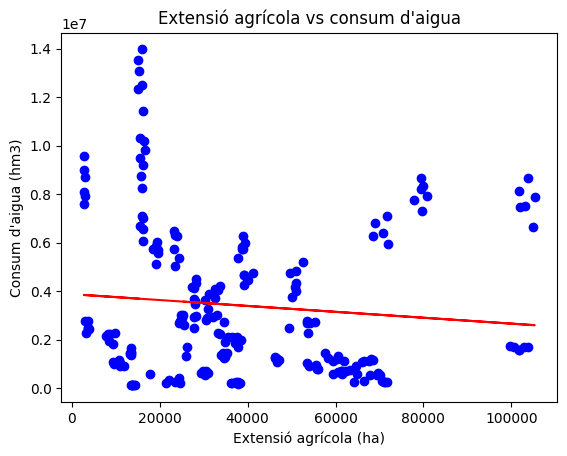

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data set.
#El codi de Comarca està normalitzat per a totes les comarques de catalunya per l'IDESCAT.
aigua =  pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua = aigua[["Any", "Codi comarca", "Activitats econòmiques i fonts pròpies"]]
aigua = aigua[aigua["Any"] > 2018]
aigua = aigua[["Codi comarca","Any","Activitats econòmiques i fonts pròpies"]]


agrari = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa_d_explotacions_agr_coles__DUN__de_Catalunya_20250716.csv")
columnes_a_convertir = agrari.columns[[0,1,4,6,9,13,14]]
agrari[columnes_a_convertir] = agrari[columnes_a_convertir].astype("Int64")
agrari = agrari.groupby(["OC","CAMPANYA"]).HA_DEC.sum().reset_index()
agrari = agrari[agrari["OC"] >0] 

#La comarca 43, lluçanès desapareix perquè no apreix a la base de dades agrària.
merge2 = aigua.merge(agrari, left_on=["Codi comarca","Any"], right_on=["OC","CAMPANYA"])
merge2 = merge2[merge2["Activitats econòmiques i fonts pròpies"] < 15000000]#s'eliminen per raons d'indústria
merge2 = merge2.dropna()


data = merge2[["HA_DEC"]]
# Test de Shapiro-Wilk

stat, p = shapiro(data)
print("Estadístico:", stat)
print("p-valor:", p)



if p > 0.05:
    print("No se rechaza H0 → los datos parecen normales")
else:
    print("Se rechaza H0 → los datos NO son normales")

import seaborn as sns
import scipy.stats as stats

sns.histplot(data, kde=True)
plt.show()


# Datos de ejemplo
y = np.array(merge2["Activitats econòmiques i fonts pròpies"])
x = np.array(merge2["HA_DEC"]) 
# Calcular coeficiente y p-valor
coef, p = pearsonr(x, y)
coef1, p1 = spearmanr(x,y)
print("Coeficiente de Pearson:", coef)
print("Coeficiente de Spearman:", coef1)
print("p-valor:", p)
print("p-valor:", p1)


# Datos de ejemplo
y = np.array(merge2["Activitats econòmiques i fonts pròpies"])  # variable independiente
X = np.array(merge2["HA_DEC"]).reshape(-1,1)                # variable dependiente

# Creamos el modelo
modelo = LinearRegression()

# Entrenamos
modelo.fit(X, y)

# Predicciones
y_pred = modelo.predict(X)

# Resultados
print("Coeficiente (pendiente):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("R²:", modelo.score(X, y))

# Gráfico
plt.scatter(X, y, color="blue", label="Datos reales")
plt.plot(X, y_pred, color="red", label="Recta de regresión")
plt.xlabel("Extensió agrícola (ha)")
plt.ylabel("Consum d'aigua (hm3)")
plt.title("Extensió agrícola vs consum d'aigua")
plt.show()

In [ ]:
#El codi de Comarca està normalitzat per a totes les comarques de catalunya per l'IDESCAT.
aigua =  pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua = aigua[["Any", "Codi comarca", "Activitats econòmiques i fonts pròpies"]]
aigua = aigua[aigua["Any"] > 2018]
aigua = aigua[["Codi comarca","Any","Activitats econòmiques i fonts pròpies"]]


agrari = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Mapa_d_explotacions_agr_coles__DUN__de_Catalunya_20250716.csv")
columnes_a_convertir = agrari.columns[[0,1,4,6,9,13,14]]
agrari[columnes_a_convertir] = agrari[columnes_a_convertir].astype("Int64")
agrari = agrari.groupby(["OC","CAMPANYA"]).HA_DEC.sum().reset_index()
agrari = agrari[agrari["OC"] >0] 
agrari
#247 observacions
# #La comarca 43, lluçanès desapareix perquè no apreix a la base de dades agrària.
# merge2 = aigua.merge(agrari, left_on=["Codi comarca","Any"], right_on=["OC","CAMPANYA"])
# merge2 = merge1[merge1["Activitats econòmiques i fonts pròpies"] < 15000000]

OC  CAMPANYA    HA_DEC
4     1      2019  24771.50
5     1      2020  24505.78
6     1      2021  25023.07
7     1      2022  25271.86
8     1      2023  24437.08
..   ..       ...       ...
246  41      2021  15228.45
247  41      2022  15888.05
248  41      2023  15955.47
249  41      2024  16139.73
250  42      2024  17818.26

[247 rows x 3 columns]

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=['idescat:comarca'])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)

aigua = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Consum_d_aigua_a_Catalunya_per_comarques_20250715.csv")
aigua["Codi comarca"] = aigua["Codi comarca"].astype(int)

# Merge
merged = comarques.merge(aigua, left_on="idescat:comarca", right_on="Codi comarca")
merged["Index_activitat"] = merged["Activitats econòmiques i fonts pròpies"] / merged["Domèstic xarxa"]
merged = merged[["Any","Codi comarca","Domèstic xarxa","Activitats econòmiques i fonts pròpies","Index_activitat"]]
merged

Any  Codi comarca  Domèstic xarxa  \
0    2024            14         1399649   
1    2023            14         1378139   
2    2022            14         1433782   
3    2021            14         1504130   
4    2020            14         1492692   
..    ...           ...             ...   
538  2019            42          622573   
539  2018            42          581316   
540  2017            42          601257   
541  2016            42          595949   
542  2015            42          580414   

     Activitats econòmiques i fonts pròpies  Index_activitat  
0                                   1153078         0.823834  
1                                   1216163         0.882468  
2                                   1140795         0.795654  
3                                   1125173         0.748056  
4                                   1101383         0.737850  
..                                      ...              ...  
538                                  582437         0.935532  
539                                  525638         0.904221  
540                                  535995         0.891457  
541                                  501076         0.840803  
542                                  495071         0.852962  

[543 rows x 5 columns]

In [4]:
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)
turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")
turisme.iloc[:,21]
turisme=turisme[["Tipus establiment","Número inscripció","Dígit de control","Comarca","Codi Comarca (IDESCAT)","Grup","Modalitat","Categoria","Unitat d'allotjament","Total places","Total estances"]]
agrupat =turisme.groupby("Comarca")[["Total places"]].sum().sort_values(by="Total places",ascending=False).reset_index()
turisme[turisme["Comarca"] == "Barcelonès"].groupby(["Tipus establiment","Comarca"])["Número inscripció"].nunique().reset_index().sort_values(by="Número inscripció",ascending=False)
# turisme.groupby("Tipus establiment")["Total places"].sum()
# turisme[turisme["Comarca"] == "Barcelonès"].groupby(["Tipus establiment","Comarca"])["Total places"].sum().reset_index().sort_values(by="Total places",ascending=False)
# Da lo mismo que .isna

nombre_allotjaments = turisme.groupby(["Codi Comarca (IDESCAT)","Tipus establiment"])["Total places"].sum().reset_index()
resultat= nombre_allotjaments[nombre_allotjaments["Total places"] == nombre_allotjaments.groupby("Codi Comarca (IDESCAT)")["Total places"].transform('max')]

comarques = gpd.read_file(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\catalunya_comarques.geojson")
comarques = comarques.dropna(subset=["idescat:comarca"])
comarques["idescat:comarca"] = comarques["idescat:comarca"].astype(int)
comarques = comarques.merge(resultat, left_on="idescat:comarca", right_on="Codi Comarca (IDESCAT)")

nombre_allotjaments
resultat

C:\Users\favil\AppData\Local\Temp\ipykernel_47816\838198340.py:4: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  turisme = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 10\Establiments_d_allotjament_tur_stic_inscrits_al_Registre_de_Turisme_de_Catalunya_20250716.csv")


Codi Comarca (IDESCAT)         Tipus establiment  Total places
3                         1             Turisme rural         600.0
5                         2                  Càmpings       36288.0
11                        3  Habitatges d'ús turístic        1032.0
16                        4                  Càmpings        2625.0
24                        5                    Hotels        1780.0
30                        6                    Hotels         767.0
35                        7  Habitatges d'ús turístic        1368.0
40                        8                  Càmpings       22230.0
47                        9  Habitatges d'ús turístic       11109.0
53                       10                  Càmpings       59208.0
61                       11                    Hotels       11793.0
66                       12  Habitatges d'ús turístic        4942.0
72                       13                    Hotels       90176.0
75                       14                  Càmpings        8046.0
81                       15                  Càmpings        4524.0
87                       16                  Càmpings        1284.0
94                       17  Habitatges d'ús turístic       12584.0
99                       18  Habitatges d'ús turístic         309.0
103                      19                  Càmpings        3657.0
111                      20                    Hotels        3188.0
117                      21                    Hotels       33548.0
122                      22  Habitatges d'ús turístic        3992.0
126                      23                  Càmpings        1575.0
132                      24                  Càmpings        2817.0
138                      25                  Càmpings        1794.0
145                      26                  Càmpings        7842.0
151                      27                    Hotels         221.0
155                      28                  Càmpings        1632.0
161                      29                  Càmpings         951.0
169                      30                    Hotels         434.0
173                      31                  Càmpings        5013.0
182                      32             Turisme rural         279.0
185                      33                    Hotels        3024.0
191                      34                    Hotels       43635.0
195                      35                  Càmpings        2319.0
204                      36                    Hotels       43432.0
210                      37                    Hotels         610.0
215                      38                    Hotels         371.0
220                      39  Habitatges d'ús turístic        3848.0
226                      40                    Hotels        6908.0
232                      41                    Hotels        4001.0
237                      42  Habitatges d'ús turístic         438.0
242                      43                  Càmpings         324.0